In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import chi2
# Read the CSV file
df = pd.read_csv("./ELICITATIONS/test_1/DATA//seed.csv")
df2 = pd.read_csv("./ELICITATIONS/test_1/DATA/questionnaire.csv")

In [24]:
# Display the first few rows
# df2["REALIZATION"][:10]
# df

In [25]:
df_reversed = df.iloc[::-1].reset_index(drop=True)
df_reversed

,timestamp,First Name,Last Name,Email address,1. Total Containers Flow in 2024 (TEUs) - 5%ile (0;inf) [num],1. Total Containers Flow in 2024 (TEUs) - 50%ile (0;inf) [num],1. Total Containers Flow in 2024 (TEUs) - 95%ile (0;inf) [num],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 5%ile (0;100) [%],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 50%ile (0;100) [%],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 95%ile (0;100) [%],...,7. Number of train operated genova to paduva in 2024 - 95%ile (0;inf) [TEUs],8. Total number of train in 2024 - 5%ile (0;inf) [TEUs],8. Total number of train in 2024 - 50%ile (0;inf) [TEUs],8. Total number of train in 2024 - 95%ile (0;inf) [TEUs],9. Percentage of train modes destination is Lombardy in 2024 (%)- 5%ile (0;100) [%],9. Percentage of train modes destination is Lombardy in 2024 (%) - 50%ile (0;100) [%],9. Percentage of train modes destination is Lombardy in 2024 (%) - 95%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 5%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 50%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 95%ile (0;100) [%]
0,2023-03-10-18-05-18,A1,AA1,AAA1,2400000,2447000,2500000,2.12,2.20,2.25,...,2050,9050,10000,10500,38,45,60,44,47,48.0
1,2023-03-10-18-08-49,A2,AA2,AAA2,2350000,2450000,2600000,1.80,2.10,2.50,...,2120,8600,10000,11000,30,40,52,40,48,50.0
2,2023-03-10-18-13-12,A3,AA3,AAA3,2370000,2380000,2400000,2.20,2.25,2.30,...,1980,10000,10200,10500,45,49,55,46,48,48.5
3,2023-03-13-10-28-27,A4,AA4,AAA4,1340000,1350000,1500000,2.00,2.20,2.40,...,1990,9800,10100,10200,33,46,50,43,46,51.0
4,2023-03-13-12-09-05,A5,AA5,AAA5,1410000,1450000,1500000,2.40,2.50,2.60,...,2100,9000,9200,9900,39,42,55,40,45,55.0
5,2023-03-13-12-16-55,A6,AA6,AAA6,1100000,1420000,1500000,1.50,2.20,2.30,...,2010,9400,9600,10300,35,39,48,42,46,48.0
6,2023-03-13-12-37-09,A7,AA7,AAA7,1300000,1350000,1450000,2.60,2.70,3.00,...,18,8,14,22,20000,45000,65000,40,45,55.0
7,2023-03-13-12-53-27,A8,AA8,AAA8,1180000,1300000,1350000,1.90,2.40,2.60,...,18,8,14,22,20000,45000,65000,40,45,55.0
8,2023-03-14-09-14-20,A9,AA9,AAA9,1220000,1380000,1550000,1.90,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0
9,2023-03-14-15-11-07,A_10,AA_10,AAA_10,2000000,2200000,2400000,1.90,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0


In [26]:
Q1 = df.loc[:, df.columns.str.startswith("1.")]
expert_1 = Q1.iloc[-1]
quantile_5 = int(expert_1.iloc[0])
quantile_50 = int(expert_1.iloc[1])
quantile_95 = int(expert_1.iloc[2])
# df

In [27]:
list(float(x) for x in df.iloc[-1][4::3][:])

[2400000.0, 2.12, 47.5, 9.0, 22.2, 15.0, 1800.0, 9050.0, 38.0, 44.0]

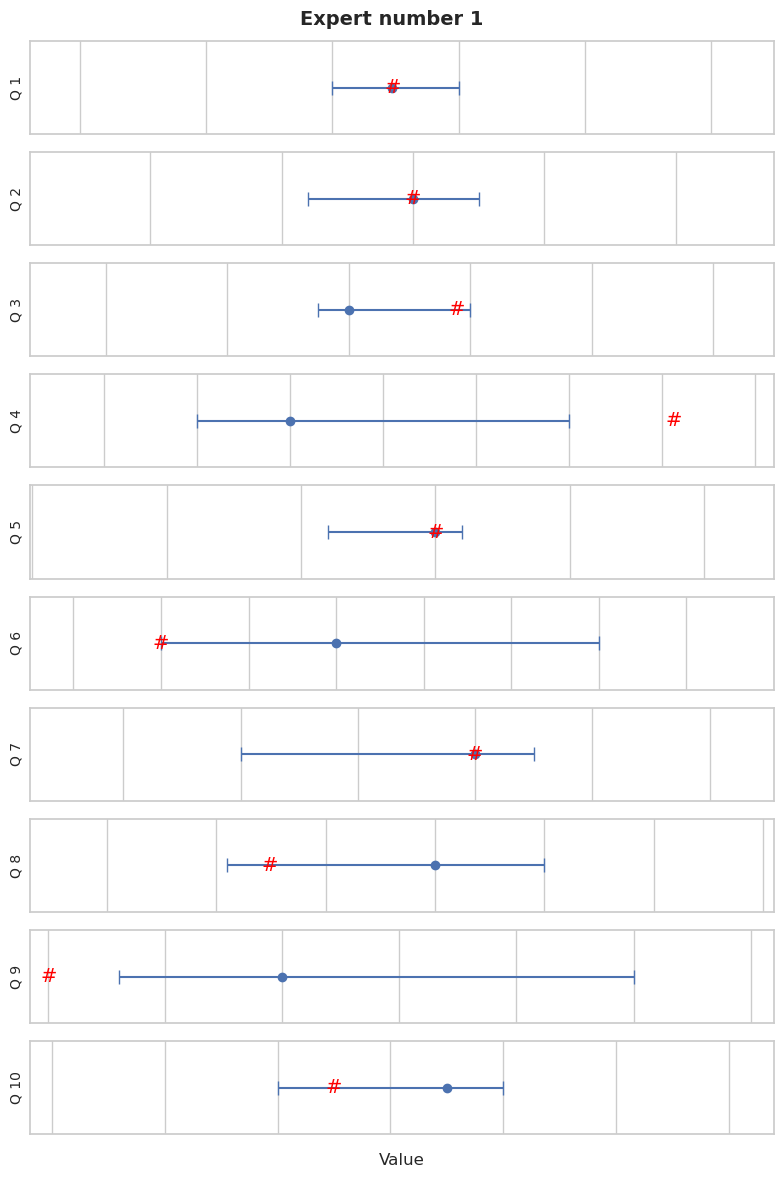

In [37]:
# Example data for 10 variables (each with 5%, 50%, 95% quantiles)
num_q = 10
variables = [f"Q {i+1}" for i in range(num_q)]
realization = df2["REALIZATION"][:10]

# Generate example quantiles
np.random.seed(42)  # For reproducibility
# q5 = np.random.randint(5, 15, num_vars)   # 5th percentile
# q5 = np.array([float(x) for x in df.iloc[-1][4::3][:]], dtype=float)

# q5 = df.iloc[-1][4::3].to_numpy(dtype=float)
q5 = df_reversed.iloc[0][4::3].to_numpy(dtype=float)
# q50 = np.random.randint(15, 25, num_vars) # 50th percentile (median)

# q50 = df.iloc[-1][5::3].to_numpy(dtype=float)
q50 = df_reversed.iloc[0][5::3].to_numpy(dtype=float)

# q95 = np.random.randint(25, 35, num_vars) # 95th percentile

# q95 = df.iloc[-1][6::3].to_numpy(dtype=float)
q95 = df_reversed.iloc[0][6::3].to_numpy(dtype=float)


# Compute error values for error bars
lower_errors = q50 - q5
upper_errors = q95 - q50

# Plotting multiple axes with independent scales
fig, axes = plt.subplots(num_q, 1, figsize=(8, 12), sharex=False)  # Separate y-axes

# Add a title to the whole figure
fig.suptitle("Expert number 1", fontsize=14, fontweight="bold")

fig.gca().spines.values()
# spine.set_edgecolor("black")
# spine.set_linewidth(2)


for i, ax in enumerate(axes):
    ax.errorbar(q50[i], 0, xerr=[[lower_errors[i]], [upper_errors[i]]], fmt='o', color='b', capsize=5, label="90% CI")
    ax.text(realization[i], 0, "#", fontsize=14, color='red', ha='center', va='center')
    # ax.set_title(variables[i], fontsize=10)
    ax.set_ylabel(variables[i], fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xticklabels([])  # Hide x-axis tick labels
    ax.set_xlim(q5[i] - .1*q5[i], q95[i] + .1*q95[i])  # Independent x-axis limits for each variable

# Adjust layout
plt.xlabel("Value")
# plt.title("Expert No: E1")
plt.tight_layout()
plt.savefig("figure1.png", dpi=300, bbox_inches='tight')
plt.show()

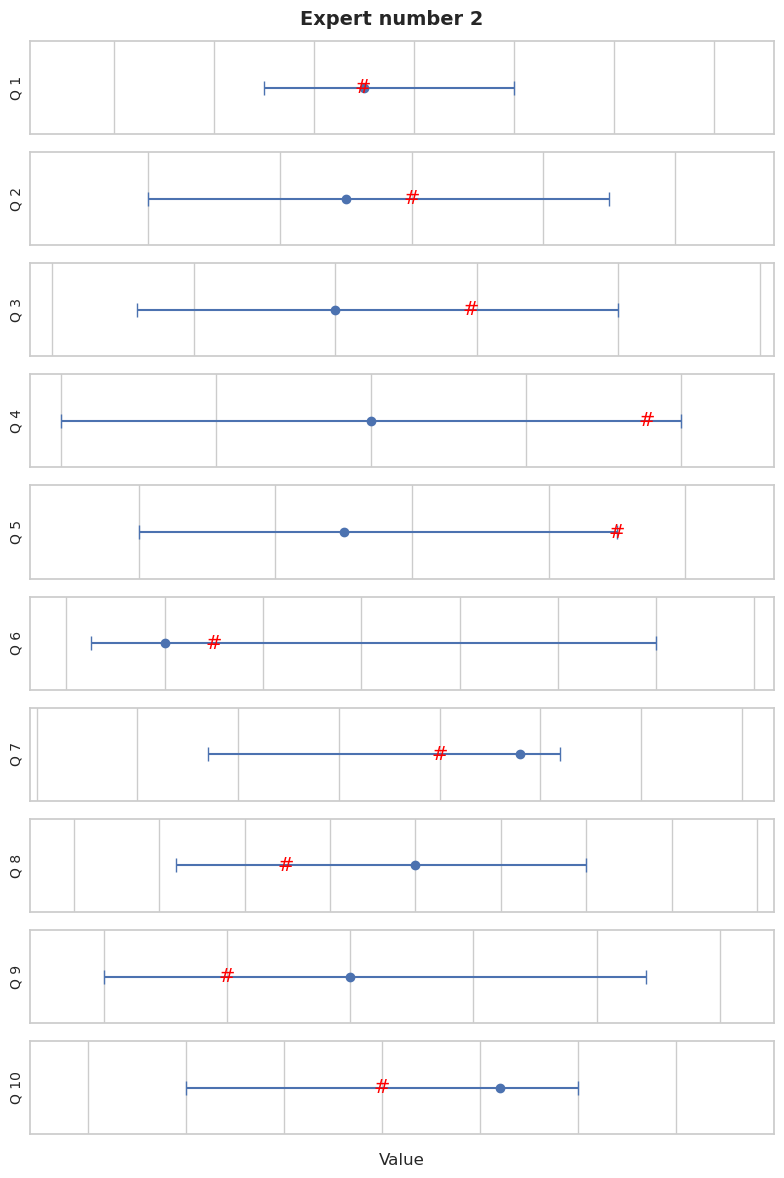

In [ ]:
# Example data for 10 variables (each with 5%, 50%, 95% quantiles)
num_q = 10
variables = [f"Q {i+1}" for i in range(num_q)]
realization = df2["REALIZATION"][:10]

# Generate example quantiles
np.random.seed(42)  # For reproducibility
# q5 = np.random.randint(5, 15, num_vars)   # 5th percentile
# q5 = np.array([float(x) for x in df.iloc[-1][4::3][:]], dtype=float)

# q5 = df.iloc[-1][4::3].to_numpy(dtype=float)
q5 = df_reversed.iloc[1][4::3].to_numpy(dtype=float)
# q50 = np.random.randint(15, 25, num_vars) # 50th percentile (median)

# q50 = df.iloc[-1][5::3].to_numpy(dtype=float)
q50 = df_reversed.iloc[1][5::3].to_numpy(dtype=float)

# q95 = np.random.randint(25, 35, num_vars) # 95th percentile

# q95 = df.iloc[-1][6::3].to_numpy(dtype=float)
q95 = df_reversed.iloc[1][6::3].to_numpy(dtype=float)


# Compute error values for error bars
lower_errors = q50 - q5
upper_errors = q95 - q50

# Plotting multiple axes with independent scales
fig, axes = plt.subplots(num_q, 1, figsize=(8, 12), sharex=False)  # Separate y-axes

# Add a title to the whole figure
fig.suptitle("Expert number 2", fontsize=14, fontweight="bold")

fig.gca().spines.values()
# spine.set_edgecolor("black")
# spine.set_linewidth(2)


for i, ax in enumerate(axes):
    ax.errorbar(q50[i], 0, xerr=[[lower_errors[i]], [upper_errors[i]]], fmt='o', color='b', capsize=5, label="90% CI")
    ax.text(realization[i], 0, "#", fontsize=14, color='red', ha='center', va='center')
    # ax.set_title(variables[i], fontsize=10)
    ax.set_ylabel(variables[i], fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xticklabels([])  # Hide x-axis tick labels
    ax.set_xlim(q5[i] - .1*q5[i], q95[i] + .1*q95[i])  # Independent x-axis limits for each variable

# Adjust layout
plt.xlabel("Value")
# plt.title("Expert No: E1")
plt.tight_layout()
plt.savefig("figure2.png", dpi=300, bbox_inches='tight')
plt.show()

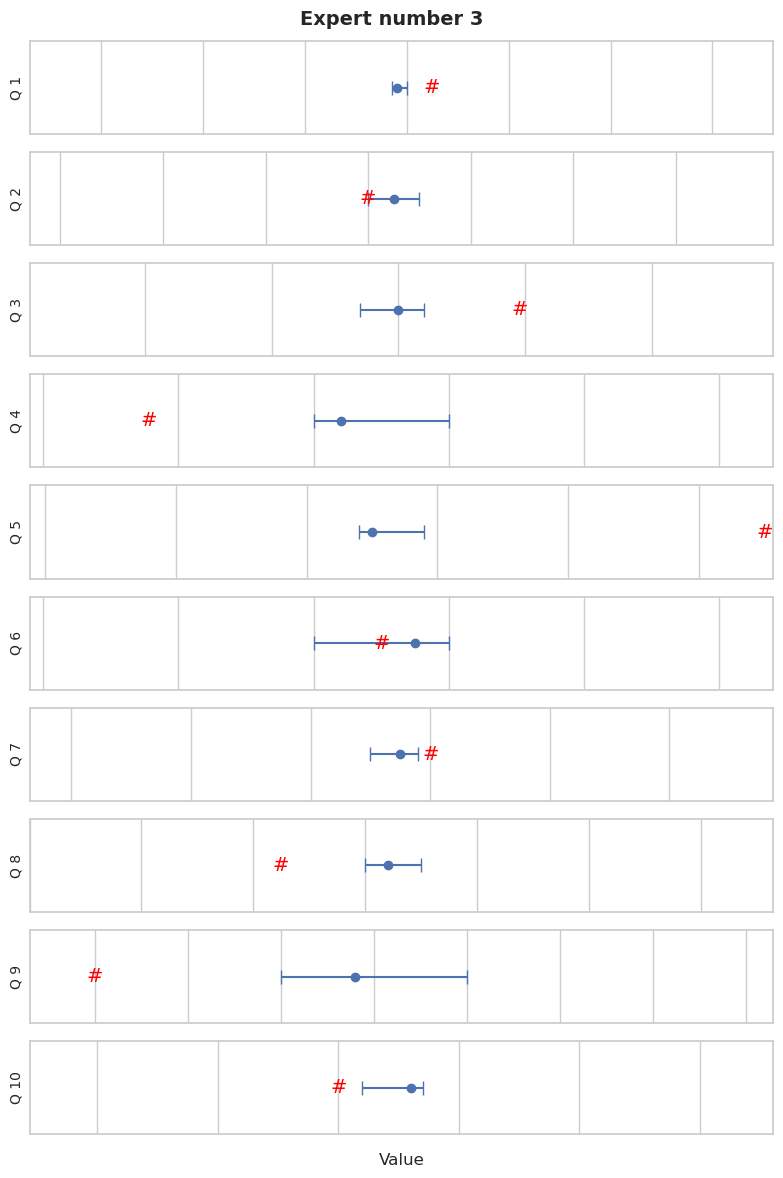

In [50]:
# Example data for 10 variables (each with 5%, 50%, 95% quantiles)
num_q = 10
variables = [f"Q {i+1}" for i in range(num_q)]
realization = df2["REALIZATION"][:10]

# Generate example quantiles
np.random.seed(42)  # For reproducibility
# q5 = np.random.randint(5, 15, num_vars)   # 5th percentile
# q5 = np.array([float(x) for x in df.iloc[-1][4::3][:]], dtype=float)

# q5 = df.iloc[-1][4::3].to_numpy(dtype=float)
q5 = df_reversed.iloc[2][4::3].to_numpy(dtype=float)
# q50 = np.random.randint(15, 25, num_vars) # 50th percentile (median)

# q50 = df.iloc[-1][5::3].to_numpy(dtype=float)
q50 = df_reversed.iloc[2][5::3].to_numpy(dtype=float)

# q95 = np.random.randint(25, 35, num_vars) # 95th percentile

# q95 = df.iloc[-1][6::3].to_numpy(dtype=float)
q95 = df_reversed.iloc[2][6::3].to_numpy(dtype=float)


# Compute error values for error bars
lower_errors = q50 - q5
upper_errors = q95 - q50

# Plotting multiple axes with independent scales
fig, axes = plt.subplots(num_q, 1, figsize=(8, 12), sharex=False)  # Separate y-axes

# Add a title to the whole figure
fig.suptitle("Expert number 3", fontsize=14, fontweight="bold")

fig.gca().spines.values()
# spine.set_edgecolor("black")
# spine.set_linewidth(2)


for i, ax in enumerate(axes):
    ax.errorbar(q50[i], 0, xerr=[[lower_errors[i]], [upper_errors[i]]], fmt='o', color='b', capsize=5, label="90% CI")
    ax.text(realization[i], 0, "#", fontsize=14, color='red', ha='center', va='center')
    # ax.set_title(variables[i], fontsize=10)
    ax.set_ylabel(variables[i], fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xticklabels([])  # Hide x-axis tick labels
    ax.set_xlim(q5[i] - .3*q5[i], q95[i] + .3*q95[i])  # Independent x-axis limits for each variable

# Adjust layout
plt.xlabel("Value")
# plt.title("Expert No: E1")
plt.tight_layout()
plt.savefig("figure3.png", dpi=300, bbox_inches='tight')
plt.show()

In [68]:
# calibration Score for each expert
# Kullback-Leibler divergence



def safe_log_term(s, p):
    if s == 0:
        return 0
    else:
        return s * math.log(s / p)

n_e = 6
n_q = 10
p1, p2, p3, p4 = .05, .45, .45, .05 # Theoretical probability vector
# Ie = []
Ie = np.zeros(n_e)

for j in range(n_e):
    # Extract quantiles from the current row in reverse order
    row = df_reversed.iloc[j]
    # print(j)
   
    q5 = row[4::3].to_numpy(dtype=float)
    q50 = row[5::3].to_numpy(dtype=float)
    q95 = row[6::3].to_numpy(dtype=float)

    # Initialize counters
    s1 = s2 = s3 = s4 = 0 # empirical probability vector

    # Categorise realizations based on quantile thresholds
    for i in range(n_q):
        r = realization[i]
        if r <= q5[i]:
            s1 += 1
        elif q5[i] < r <= q50[i]:
            s2 += 1
        elif q50[i] < r <= q95[i]:
            s3 += 1
        else:  # r > q95[i]
            s4 += 1

    # Convert counts to proportions
    s1 /= n_q
    s2 /= n_q
    s3 /= n_q
    s4 /= n_q

    # Compute divergence using safe log terms
    I = (
        safe_log_term(s1, p1) +
        safe_log_term(s2, p2) +
        safe_log_term(s3, p3) +
        safe_log_term(s4, p4)
    )
    
    Ie[j] = I
Ie

array([0.2370678 , 0.10536052, 1.83266142, 0.53096114, 0.80300841,
       1.05671067])

In [69]:
Ie_new = 2 * n_q * Ie
dof = 3  # degrees of freedom
# Ie_new = 2 * n_q * Ie
Cal_e = 1 - chi2.cdf(Ie_new, dof)

# PDF (probability density function)
# x = 5
# pdf_val = chi2.pdf(x, dof)

# CDF (cumulative distribution function)
# cdf_val = chi2.cdf(Ie[0], dof)
# cdf_val

# # Inverse CDF (quantile function)
# q = 0.95
# inv_cdf = chi2.ppf(q, dof)

# # Random samples
# samples = chi2.rvs(df, size=1000)
Cal_e
# Ie

array([1.91746014e-01, 5.50455446e-01, 5.44812090e-08, 1.39735718e-02,
       1.10222501e-03, 9.87310537e-05])

In [70]:
# Create index and DataFrame
expert_labels = [f"e{i+1}" for i in range(len(Cal_e))]
df1 = pd.DataFrame({'calibration score': Cal_e}, index=expert_labels)
df1

,calibration score
e1,1.917460e-01
e2,5.504554e-01
e3,5.448121e-08
e4,1.397357e-02
e5,1.102225e-03
e6,9.873105e-05


In [71]:
df_reversed

,timestamp,First Name,Last Name,Email address,1. Total Containers Flow in 2024 (TEUs) - 5%ile (0;inf) [num],1. Total Containers Flow in 2024 (TEUs) - 50%ile (0;inf) [num],1. Total Containers Flow in 2024 (TEUs) - 95%ile (0;inf) [num],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 5%ile (0;100) [%],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 50%ile (0;100) [%],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 95%ile (0;100) [%],...,7. Number of train operated genova to paduva in 2024 - 95%ile (0;inf) [TEUs],8. Total number of train in 2024 - 5%ile (0;inf) [TEUs],8. Total number of train in 2024 - 50%ile (0;inf) [TEUs],8. Total number of train in 2024 - 95%ile (0;inf) [TEUs],9. Percentage of train modes destination is Lombardy in 2024 (%)- 5%ile (0;100) [%],9. Percentage of train modes destination is Lombardy in 2024 (%) - 50%ile (0;100) [%],9. Percentage of train modes destination is Lombardy in 2024 (%) - 95%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 5%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 50%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 95%ile (0;100) [%]
0,2023-03-10-18-05-18,A1,AA1,AAA1,2400000,2447000,2500000,2.12,2.20,2.25,...,2050,9050,10000,10500,38,45,60,44,47,48.0
1,2023-03-10-18-08-49,A2,AA2,AAA2,2350000,2450000,2600000,1.80,2.10,2.50,...,2120,8600,10000,11000,30,40,52,40,48,50.0
2,2023-03-10-18-13-12,A3,AA3,AAA3,2370000,2380000,2400000,2.20,2.25,2.30,...,1980,10000,10200,10500,45,49,55,46,48,48.5
3,2023-03-13-10-28-27,A4,AA4,AAA4,1340000,1350000,1500000,2.00,2.20,2.40,...,1990,9800,10100,10200,33,46,50,43,46,51.0
4,2023-03-13-12-09-05,A5,AA5,AAA5,1410000,1450000,1500000,2.40,2.50,2.60,...,2100,9000,9200,9900,39,42,55,40,45,55.0
5,2023-03-13-12-16-55,A6,AA6,AAA6,1100000,1420000,1500000,1.50,2.20,2.30,...,2010,9400,9600,10300,35,39,48,42,46,48.0
6,2023-03-13-12-37-09,A7,AA7,AAA7,1300000,1350000,1450000,2.60,2.70,3.00,...,18,8,14,22,20000,45000,65000,40,45,55.0
7,2023-03-13-12-53-27,A8,AA8,AAA8,1180000,1300000,1350000,1.90,2.40,2.60,...,18,8,14,22,20000,45000,65000,40,45,55.0
8,2023-03-14-09-14-20,A9,AA9,AAA9,1220000,1380000,1550000,1.90,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0
9,2023-03-14-15-11-07,A_10,AA_10,AAA_10,2000000,2200000,2400000,1.90,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0


In [78]:
realization = list(realization)

In [84]:
q5_ = df_reversed.iloc[:6, 4::3]
q5_.loc[len(q5_)] = realization
lower_bounds = q5_.min().to_numpy()

q95_ = df_reversed.iloc[:6, 6::3]
q95_.loc[len(q95_)] = realization
upper_bounds = q95_.max().to_numpy()
k = .1
L_star = lower_bounds - k * (upper_bounds - lower_bounds)
U_star = upper_bounds + k * (upper_bounds - lower_bounds)
U_star

array([2.7500e+06, 2.7100e+00, 5.7500e+01, 1.7300e+01, 2.6200e+01,
       8.4575e+02, 2.1550e+03, 1.1240e+04, 6.3000e+01, 5.6500e+01])

In [86]:
q5_.iloc[0]

1. Total Containers Flow in 2024 (TEUs) - 5%ile (0;inf) [num]                                   2400000.00
2. Growth Rate of Container Traffic 2023 to 2024 (%) - 5%ile (0;100) [%]                              2.12
3. Import flow type percentage in 2024 (%) - 5%ile (0;100) [%]                                       47.50
4. Transhiped flow mode percentage in 2024 (%) - 5%ile (0;inf) [day]                                  9.00
5. Empty containers percentage in 2024 (%) - 5%ile (0;inf) [day]                                     22.20
6. Total gateway container flow was transported by rail in 2024 (%) - 5%ile (0;inf) [num]            15.00
7. Number of train operated genova to paduva in 2024 - 5%ile (0;inf) [TEUs]                        1800.00
8. Total number of train in 2024 - 5%ile (0;inf) [TEUs]                                            9050.00
9. Percentage of train modes destination is Lombardy in 2024 (%)- 5%ile (0;100) [%]                  38.00
10. Percentage of total containers tr

In [88]:
# Assume df_reversed and realization are already defined
n_e = 6
n_q = 10
k = 0.1

# 1. Extract quantile data
q5_ = df_reversed.iloc[:6, 4::3].copy()
q5_.loc[len(q5_)] = realization
lower_bounds = q5_.min().to_numpy()

q50_ = df_reversed.iloc[:6, 5::3]

q95_ = df_reversed.iloc[:6, 6::3].copy()
q95_.loc[len(q95_)] = realization
upper_bounds = q95_.max().to_numpy()

# 2. Calculate extended bounds
L_star = lower_bounds - k * (upper_bounds - lower_bounds)
U_star = upper_bounds + k * (upper_bounds - lower_bounds)

# 3. Safe log function
def safe_log_term(numerator, denominator):
    if denominator <= 0:
        return 0
    return numerator * math.log(numerator / denominator)

# 4. Information score per expert
INF_E = []

for j in range(n_e):
    Ij_E = []
    
    for i in range(n_q):
        q5_val = q5_.iloc[j, i]
        q50_val = q50_.iloc[j, i]
        q95_val = q95_.iloc[j, i]
        
        Ij_e = (
            safe_log_term(0.05, q5_val - lower_bounds[i]) +
            safe_log_term(0.45, q50_val - q5_val) +
            safe_log_term(0.45, q95_val - q50_val) +
            safe_log_term(0.05, upper_bounds[i] - q95_val) +
            math.log(max(U_star[i] - L_star[i], 1e-10))
        )

        Ij_E.append(Ij_e)

    INF_E.append(np.mean(Ij_E))

# print(INF_E)
df1["information score"] = INF_E
df1

,calibration score,information score
e1,1.917460e-01,1.765394
e2,5.504554e-01,1.155161
e3,5.448121e-08,2.247722
e4,1.397357e-02,1.136720
e5,1.102225e-03,1.073561
e6,9.873105e-05,0.970762


In [96]:
# Combined Score
df1["combined score"] = df1["calibration score"] * df1["information score"]
df1["performance_based weights"] = df1["combined score"] / df1["combined score"].sum()

df1

,calibration score,information score,combined score,performance_based weights
e1,1.917460e-01,1.765394,3.385073e-01,3.413972e-01
e2,5.504554e-01,1.155161,6.358644e-01,6.412929e-01
e3,5.448121e-08,2.247722,1.224586e-07,1.235040e-07
e4,1.397357e-02,1.136720,1.588404e-02,1.601964e-02
e5,1.102225e-03,1.073561,1.183306e-03,1.193408e-03
e6,9.873105e-05,0.970762,9.584437e-05,9.666261e-05


In [ ]:
# Decision maker base on significance level
alpha = .05
df1['DMSL'] = df1["combined score"]
df1.loc[df1["calibration score"] <= alpha, 'DMSL'] = 0
df1['DMSL'] = df1['DMSL'] / df1['DMSL'].sum()
df1

,calibration score,information score,combined score,performance_based weights,DMSL
e1,1.917460e-01,1.765394,3.385073e-01,3.413972e-01,0.347411
e2,5.504554e-01,1.155161,6.358644e-01,6.412929e-01,0.652589
e3,5.448121e-08,2.247722,1.224586e-07,1.235040e-07,0.000000
e4,1.397357e-02,1.136720,1.588404e-02,1.601964e-02,0.000000
e5,1.102225e-03,1.073561,1.183306e-03,1.193408e-03,0.000000
e6,9.873105e-05,0.970762,9.584437e-05,9.666261e-05,0.000000


In [106]:
df1['DMSL'].iloc[0]

np.float64(0.3474108687717845)

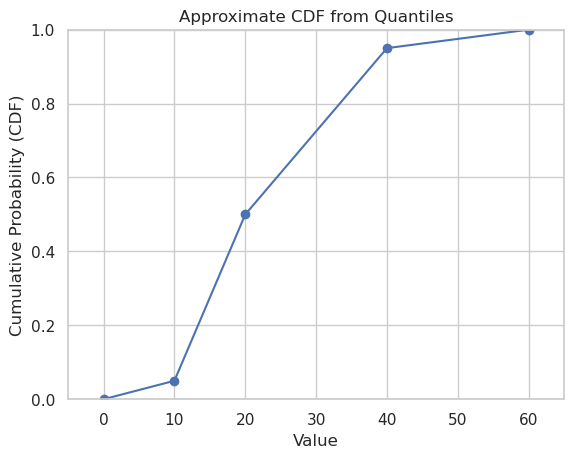

In [101]:
# Example quantiles (replace with your actual values)
q5 = 10
q50 = 20
q95 = 40
# q0 = 0
# q100 = 1

# Approximate 0% and 100% values (extrapolated linearly)
q0 = q5 - (q50 - q5)        # assumes symmetry around q5
q100 = q95 + (q95 - q50)    # assumes symmetry beyond q95

# Define x (value) and y (CDF) points
x = [q0, q5, q50, q95, q100]
y = [0.00, 0.05, 0.50, 0.95, 1.00]

# Plot the approximate CDF
plt.plot(x, y, marker='o')
plt.title("Approximate CDF from Quantiles")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability (CDF)")
plt.grid(True)
plt.ylim(0, 1)
plt.xlim(min(x) - 5, max(x) + 5)
plt.show()


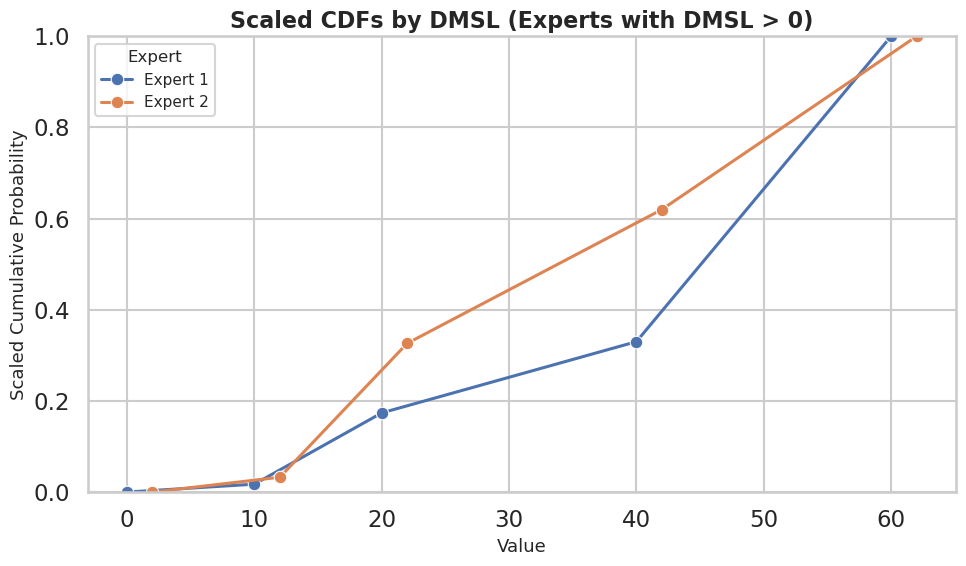

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example quantiles (replace with real values)
quantiles = [
    (10, 20, 40),
    (12, 22, 42),
    (9, 19, 38),
    (11, 21, 39),
    (13, 23, 41),
    (14, 24, 43)
]

# Example DMSL values (replace with df1['DMSL'].values)
# dmsl_values = [0.1, 0.3, 0.0, 0.25, 0.0, 0.4]
# df1 = pd.DataFrame({'DMSL': dmsl_values})

expert_labels = [f"Expert {i+1}" for i in range(len(quantiles))]

# Collect data for plotting
plot_data = []

for i, (label, (q5, q50, q95)) in enumerate(zip(expert_labels, quantiles)):
    dmsl_scale = df1['DMSL'].iloc[i]
    
    # Skip if DMSL is zero
    if dmsl_scale == 0:
        continue

    q0 = q5 - (q50 - q5)
    q100 = q95 + (q95 - q50)

    x = [q0, q5, q50, q95, q100]
    y = [0.00, 0.05, 0.50, 0.95, 1.00]
    # y_scaled = [val * dmsl_scale for val in y]
    # Scale intermediate points, keep final point at 1.0
    y_scaled = [val * dmsl_scale for val in y[:-1]] + [1.0]

    for xi, yi in zip(x, y_scaled):
        plot_data.append({'Value': xi, 'Scaled CDF': yi, 'Expert': label})

# Convert to DataFrame
df_plot = pd.DataFrame(plot_data)

# Plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_plot, x="Value", y="Scaled CDF", hue="Expert", marker="o", linewidth=2.2)

# Final styling
plt.title("Scaled CDFs by DMSL (Experts with DMSL > 0)", fontsize=16, weight='bold')
plt.xlabel("Value", fontsize=13)
plt.ylabel("Scaled Cumulative Probability", fontsize=13)
plt.ylim(0, 1)
plt.legend(title="Expert", fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.grid(True)
plt.show()


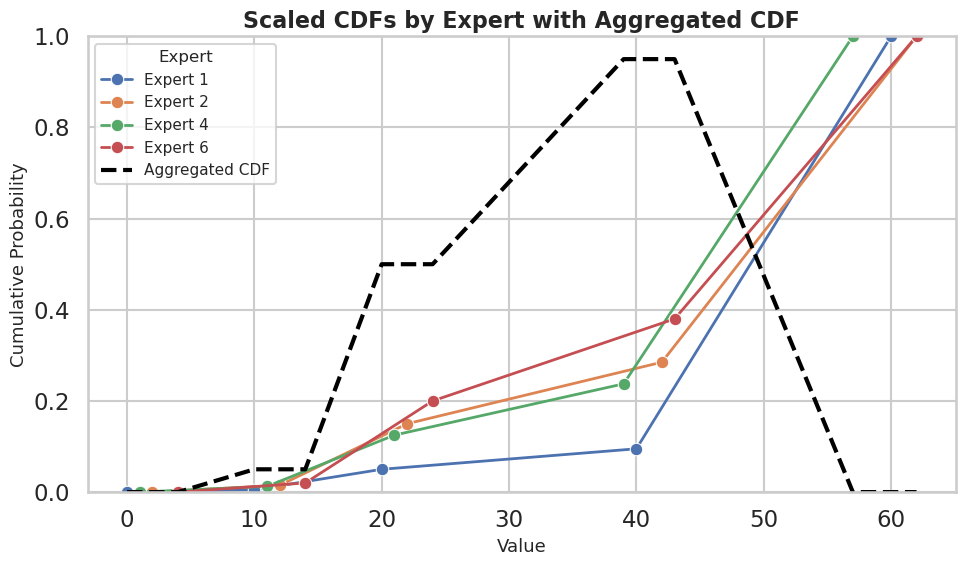

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual quantiles and DMSL values)
quantiles = [
    (10, 20, 40),
    (12, 22, 42),
    (9, 19, 38),
    (11, 21, 39),
    (13, 23, 41),
    (14, 24, 43)
]
dmsl_values = [0.1, 0.3, 0.0, 0.25, 0.0, 0.4]
df1 = pd.DataFrame({'DMSL': dmsl_values})
expert_labels = [f"Expert {i+1}" for i in range(len(quantiles))]

# Data containers
plot_data = []
agg_cdf_points = {}

# Fixed cumulative probabilities
y = [0.00, 0.05, 0.50, 0.95, 1.00]

# Collect individual and aggregated CDF points
for i, (label, (q5, q50, q95)) in enumerate(zip(expert_labels, quantiles)):
    dmsl = df1["DMSL"].iloc[i]
    if dmsl == 0:
        continue

    q0 = q5 - (q50 - q5)
    q100 = q95 + (q95 - q50)
    x = [q0, q5, q50, q95, q100]
    
    # Scaled y values except for the last point which is fixed at 1.0
    y_scaled = [v * dmsl for v in y[:-1]] + [1.0]

    # Add to plot data
    for xi, yi in zip(x, y_scaled):
        plot_data.append({'Value': xi, 'Scaled CDF': yi, 'Expert': label})

        # For aggregation
        if xi not in agg_cdf_points:
            agg_cdf_points[xi] = {'total_weight': 0, 'weighted_cdf': 0}
        if yi < 1.0:  # avoid including forced 1.0 in aggregation
            agg_cdf_points[xi]['total_weight'] += dmsl
            agg_cdf_points[xi]['weighted_cdf'] += yi

# Compute aggregated CDF
agg_x, agg_y = [], []
for xi in sorted(agg_cdf_points):
    total_weight = agg_cdf_points[xi]['total_weight']
    weighted_cdf = agg_cdf_points[xi]['weighted_cdf']
    if total_weight > 0:
        agg_x.append(xi)
        agg_y.append(weighted_cdf / total_weight)
    else:
        agg_x.append(xi)
        agg_y.append(0)

# Create DataFrame for individual expert lines
df_plot = pd.DataFrame(plot_data)

# Plot setup
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))

# Plot individual CDFs
sns.lineplot(data=df_plot, x="Value", y="Scaled CDF", hue="Expert", marker="o", linewidth=2)

# Plot aggregated line
plt.plot(agg_x, agg_y, color='black', linewidth=3, linestyle='--', label='Aggregated CDF')

# Final styling
plt.title("Scaled CDFs by Expert with Aggregated CDF", fontsize=16, weight='bold')
plt.xlabel("Value", fontsize=13)
plt.ylabel("Cumulative Probability", fontsize=13)
plt.ylim(0, 1)
plt.legend(title="Expert", fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.grid(True)
plt.show()


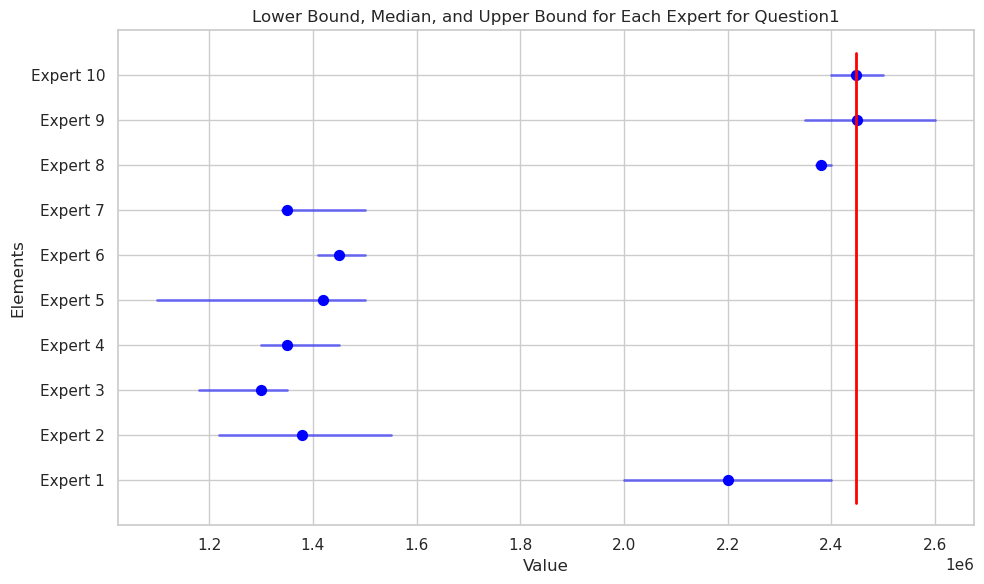

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
lower_bounds = list(df.iloc[:,4]) # 10 elements
medians = list(df.iloc[:,5])
upper_bounds = list(df.iloc[:,6])

realization = list(df2.iloc[:, 8])[0]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot lines for each element
for i in range(10):
    y_pos = i + 1  # y increases by 1 for each element
    
    # Plot the range (lower to upper bound)
    plt.plot([lower_bounds[i], upper_bounds[i]], [y_pos, y_pos], 
             color='blue', alpha=0.5, linewidth=2)
    
    
    # Add a dot at the median position
    plt.scatter(medians[i], y_pos, color='blue', s=50)

# Plot the range (lower to upper bound)
plt.plot([realization, realization], [.5, 10.5], color='red', linewidth=2)  # Line from (3,1) to (5,1)


# Customize the plot
plt.yticks(np.arange(1, 11), [f"Expert {i+1}" for i in range(10)])
plt.xlabel("Value")
plt.ylabel("Elements")
plt.title("Lower Bound, Median, and Upper Bound for Each Expert for Question1")
plt.grid(True, axis='x')

plt.tight_layout()
plt.show()

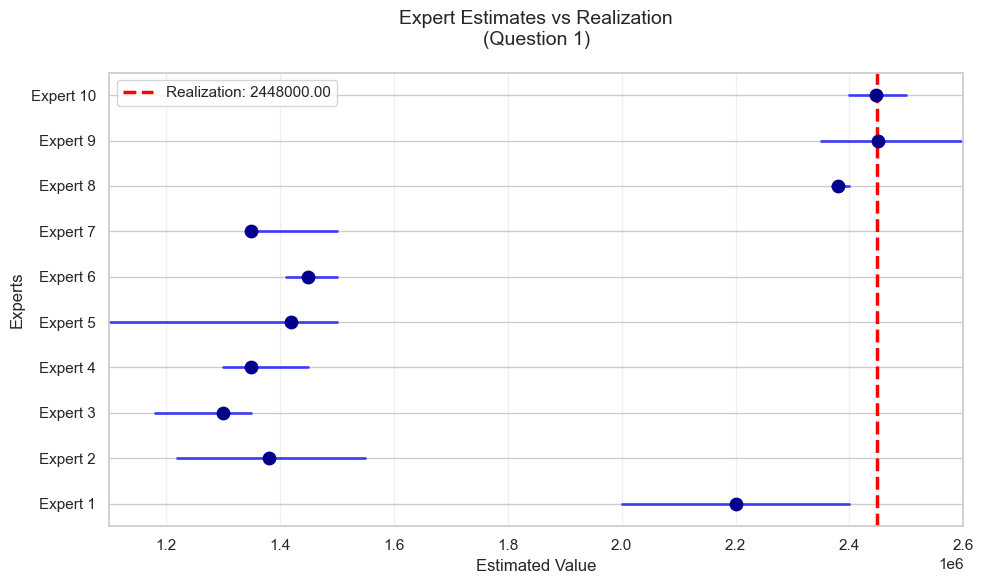

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot expert ranges and medians
for i in range(10):
    y_pos = i + 1
    
    # Plot the range lines
    plt.plot([lower_bounds[i], upper_bounds[i]], [y_pos, y_pos], 
             color='blue', alpha=0.7, linewidth=2)
    
    # Plot median marker
    plt.scatter(medians[i], y_pos, color='darkblue', s=80, zorder=3)

# Plot realization line (red vertical line)
plt.axvline(x=realization, color='red', linewidth=2.5, linestyle='--', 
            label=f'Realization: {realization:.2f}')

# Add visual elements
plt.xlim(min(lower_bounds + [realization]) - 0.5, 
         max(upper_bounds + [realization]) + 0.5)
plt.ylim(0.5, 10.5)

# Customize labels and titles
plt.yticks(np.arange(1, 11), [f"Expert {i+1}" for i in range(10)])
plt.xlabel("Estimated Value", fontsize=12)
plt.ylabel("Experts", fontsize=12)
plt.title("Expert Estimates vs Realization\n(Question 1)", fontsize=14, pad=20)

# Add legend and grid
plt.legend(loc='upper left', frameon=True)
plt.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

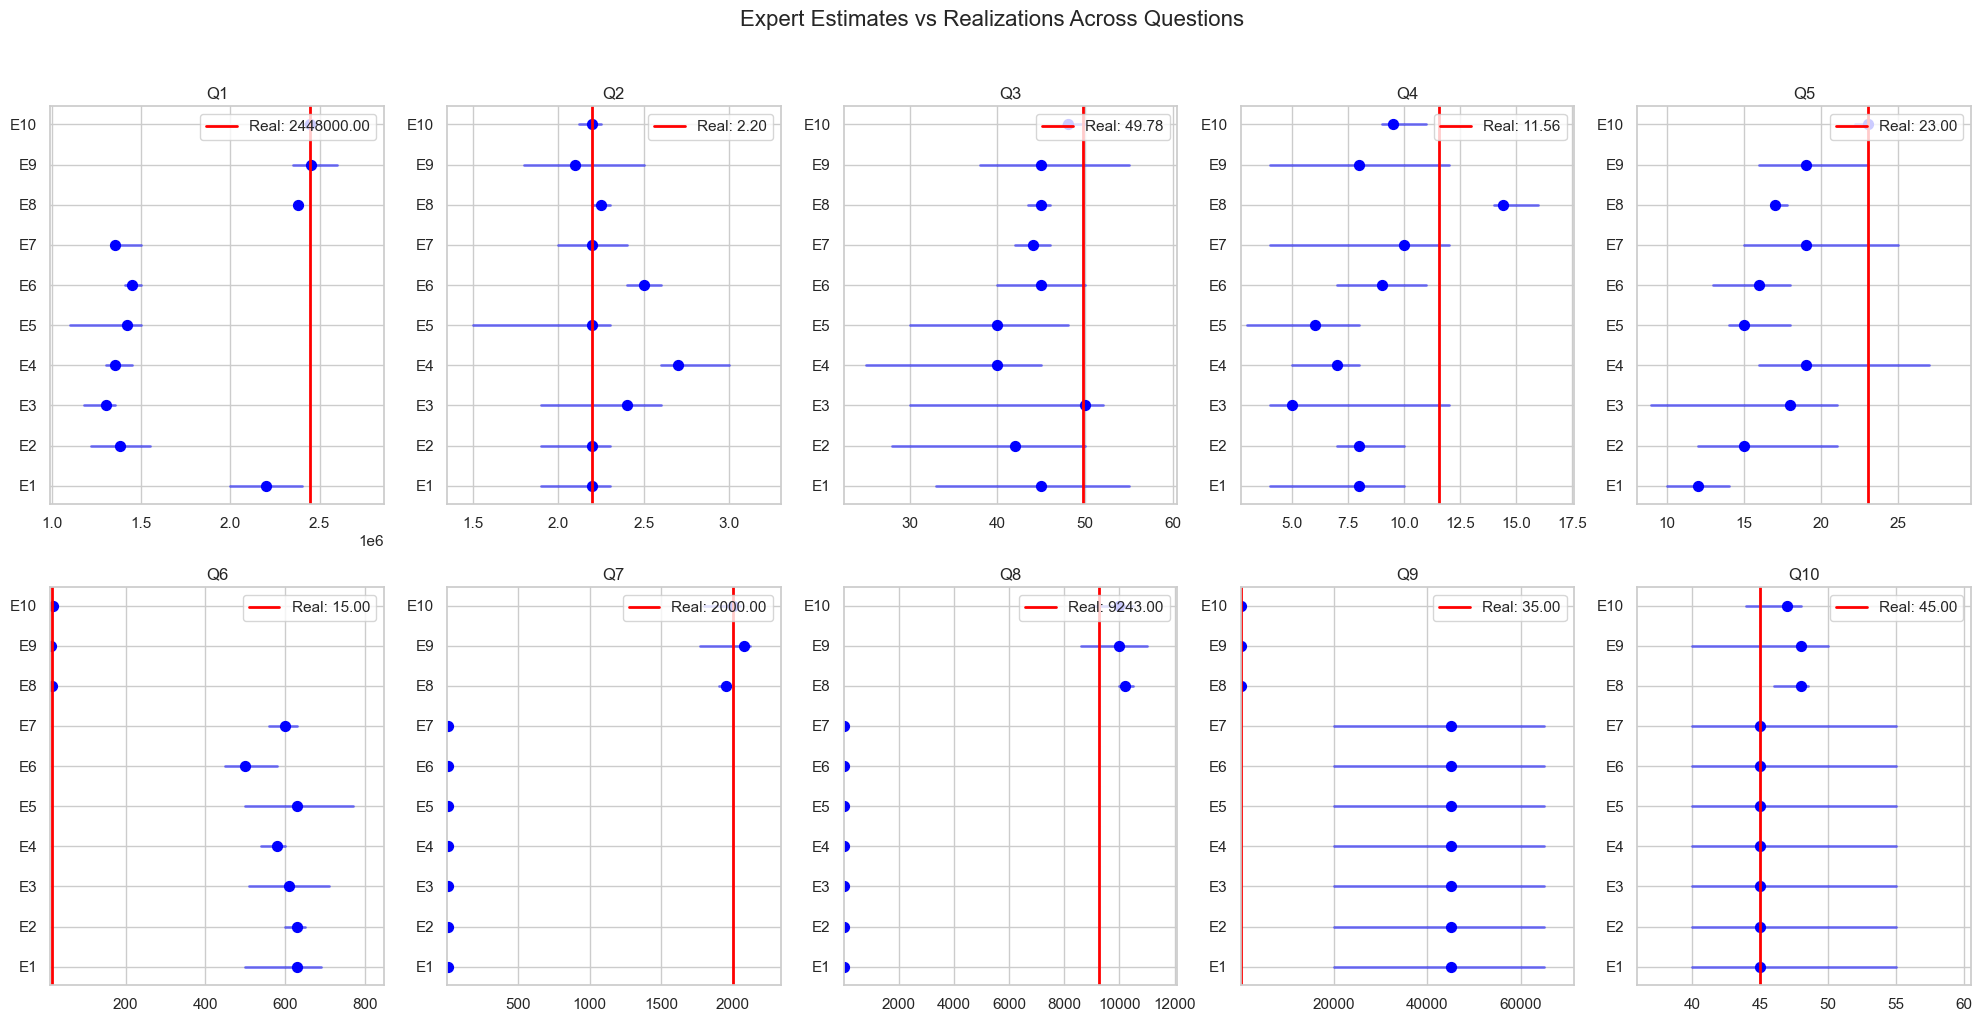

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set(style="whitegrid")

# Create figure with 10 subplots (2 rows x 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Expert Estimates vs Realizations Across Questions', y=1.02, fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create each subplot
for fig_num in range(10):
    ax = axes[fig_num]
    
    # Determine column offsets
    lb_col = 4 + fig_num*3
    med_col = 5 + fig_num*3
    ub_col = 6 + fig_num*3
    
    # Get data
    lower_bounds = list(df.iloc[:, lb_col])
    medians = list(df.iloc[:, med_col])
    upper_bounds = list(df.iloc[:, ub_col])
    realization = list(df2.iloc[:, 8])[fig_num]
    
    # Plot expert ranges and medians
    for i in range(10):
        y_pos = i + 1
        
        # Plot the range
        ax.plot([lower_bounds[i], upper_bounds[i]], [y_pos, y_pos], 
                color='blue', alpha=0.5, linewidth=2)
        
        # Plot median dot
        ax.scatter(medians[i], y_pos, color='blue', s=50)
    
    # Plot realization line
    ax.axvline(x=realization, color='red', linewidth=2, 
               label=f'Real: {realization:.2f}')
    
    # Customize subplot
    ax.set_yticks(np.arange(1, 11))
    ax.set_yticklabels([f"E{i+1}" for i in range(10)])
    ax.set_title(f'Q{fig_num+1}')
    ax.grid(True, axis='x')
    ax.legend(loc='upper right')
    
    # Set consistent x-axis limits across all subplots if desired
    all_values = lower_bounds + medians + upper_bounds + [realization]
    ax.set_xlim(min(all_values)*0.9, max(all_values)*1.1)

plt.tight_layout()
plt.show()